## Importing of the required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading of the datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
oil = pd.read_csv('oil.csv')
events = pd.read_csv('holidays_events.csv')
store = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
sample = pd.read_csv('sample_submission.csv')

### Descripitive Analysis on the Training and Oil dataset

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
train['date'].value_counts()

2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64

In [7]:
oil['date'].value_counts()

2013-01-01    1
2016-02-08    1
2016-02-17    1
2016-02-16    1
2016-02-15    1
             ..
2014-07-22    1
2014-07-21    1
2014-07-18    1
2014-07-17    1
2017-08-31    1
Name: date, Length: 1218, dtype: int64

In [8]:
oil['dcoilwtico'].fillna(0, inplace=True)

<AxesSubplot: >

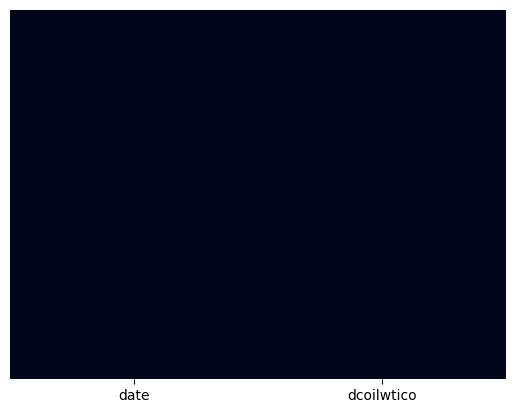

In [9]:
sns.heatmap(oil.isnull(),yticklabels = False, cbar = False)

### Merging of both the training and oil dataset

In [10]:
trainoil = pd.merge(train, oil, on='date', how='left')

In [11]:
trainoil.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,0.0


### Descriptive analysis of the Events dataset

In [13]:
events.tail(10)

,date,type,locale,locale_name,description,transferred
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False
343,2017-12-21,Additional,National,Ecuador,Navidad-4,False
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [14]:
events['type'] = events['type'].replace({'Holiday':1, 'Additional':1})

In [15]:
events.tail(10)

,date,type,locale,locale_name,description,transferred
340,2017-12-06,1,Local,Quito,Fundacion de Quito,True
341,2017-12-08,1,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False
343,2017-12-21,1,National,Ecuador,Navidad-4,False
344,2017-12-22,1,Local,Salinas,Cantonizacion de Salinas,False
345,2017-12-22,1,National,Ecuador,Navidad-3,False
346,2017-12-23,1,National,Ecuador,Navidad-2,False
347,2017-12-24,1,National,Ecuador,Navidad-1,False
348,2017-12-25,1,National,Ecuador,Navidad,False
349,2017-12-26,1,National,Ecuador,Navidad+1,False


In [16]:
events['type'].value_counts()

1           272
Event        56
Transfer     12
Bridge        5
Work Day      5
Name: type, dtype: int64

### Merging the new training and events dataset

In [17]:
eventstrain = pd.merge(trainoil, events, on='date', how='left')

In [18]:
eventstrain.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0,1,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0,1,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0,1,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0,1,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,0.0,1,National,Ecuador,Primer dia del ano,False


### Dropping of the irrelevant columns in the new training dataset

In [19]:
eventstrain.drop(['family','locale','locale_name','description','transferred'],axis=1, inplace=True)

In [20]:
eventstrain.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,type
0,0,2013-01-01,1,0.0,0,0.0,1
1,1,2013-01-01,1,0.0,0,0.0,1
2,2,2013-01-01,1,0.0,0,0.0,1
3,3,2013-01-01,1,0.0,0,0.0,1
4,4,2013-01-01,1,0.0,0,0.0,1


### Filling of null values in the new training dataset

In [21]:
eventstrain = eventstrain[pd.to_numeric(eventstrain['type'], errors='coerce').notnull()]

In [22]:
eventstrain.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,type
0,0,2013-01-01,1,0.0,0,0.0,1
1,1,2013-01-01,1,0.0,0,0.0,1
2,2,2013-01-01,1,0.0,0,0.0,1
3,3,2013-01-01,1,0.0,0,0.0,1
4,4,2013-01-01,1,0.0,0,0.0,1


### Descriptive analysis of the store dataset

In [23]:
store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [24]:
len(store['store_nbr'].value_counts())

54

### Merging of updated training dataset with the store dataset 

In [25]:
storetrain = pd.merge(eventstrain, store, on='store_nbr',how='inner')

In [26]:
storetrain.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,type_x,city,state,type_y,cluster
0,0,2013-01-01,1,0.0,0,0.0,1,Quito,Pichincha,D,13
1,1,2013-01-01,1,0.0,0,0.0,1,Quito,Pichincha,D,13
2,2,2013-01-01,1,0.0,0,0.0,1,Quito,Pichincha,D,13
3,3,2013-01-01,1,0.0,0,0.0,1,Quito,Pichincha,D,13
4,4,2013-01-01,1,0.0,0,0.0,1,Quito,Pichincha,D,13


In [27]:
storetrain.drop(['city','state'], axis=1, inplace=True)

In [28]:
storetrain.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,type_x,type_y,cluster
0,0,2013-01-01,1,0.0,0,0.0,1,D,13
1,1,2013-01-01,1,0.0,0,0.0,1,D,13
2,2,2013-01-01,1,0.0,0,0.0,1,D,13
3,3,2013-01-01,1,0.0,0,0.0,1,D,13
4,4,2013-01-01,1,0.0,0,0.0,1,D,13


### Descriptive analysis of the transactions dataset

In [29]:
len(transactions['store_nbr'].value_counts())

54

In [30]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### The transactions dataset had some issues as it would not merge with the updated training dataset

### Descriptive analysis on the training dataset

In [31]:
storetrain.drop(['date', 'id'], axis=1, inplace = True)

In [39]:
storetrain['type_y'].value_counts()

D    124146
C    103455
A     62073
B     55176
E     27588
Name: type_y, dtype: int64

### Replacing of object values with integer values in the training dataset 

In [41]:
storetrain['type_y'] = storetrain['type_y'].replace({'D':3, 'C':2, 'A':0, 'B':1, 'E':4})

In [42]:
storetrain.head()

,store_nbr,sales,onpromotion,dcoilwtico,type_x,type_y,cluster
0,1,0.0,0,0.0,1,3,13
1,1,0.0,0,0.0,1,3,13
2,1,0.0,0,0.0,1,3,13
3,1,0.0,0,0.0,1,3,13
4,1,0.0,0,0.0,1,3,13


### Splitting of the training and testing dataset

In [44]:
X_train = storetrain.drop("sales", axis=1)
Y_train = storetrain['sales']

In [45]:
X_test = test.drop(['id', 'date', 'family'], axis=1)

### Replacing of NaN values with the mean of the respective columns in the training dataset

In [49]:
Nulll = X_train.isnull().sum().sum()

In [50]:
print(Nulll)

101574


In [51]:
mean = X_train.mean()

In [52]:
X_train.fillna(mean, inplace=True)

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [53]:
model.fit(X_train, Y_train)

LinearRegression()

In [56]:
Accuracy = model.score(X_train, Y_train)*100
Accuracy

20.299136027364607

## RandomForest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model1= RandomForestRegressor()
model1.fit(X_train, Y_train)

RandomForestRegressor()

In [60]:
Accuracy1 = model1.score(X_train, Y_train)*100
Accuracy1

62.57284681164046

## DecisionTree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [65]:
Accuracy2 = model2.score(X_train, Y_train)*100
Accuracy2

64.66327978927798